In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_power=pd.read_csv("/content/opsd_germany_daily (1).csv")
df_power.head(10)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
5,2006-01-06,1403.427,NaN,NaN,NaN
6,2006-01-07,1300.287,NaN,NaN,NaN
7,2006-01-08,1207.985,NaN,NaN,NaN
8,2006-01-09,1529.323,NaN,NaN,NaN
9,2006-01-10,1576.911,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Load the dataset
df_power = pd.read_csv('/content/opsd_germany_daily (1).csv')

# Replace NaN values with 0 for 'Wind', 'Solar', and 'Wind+Solar' columns
df_power[['Wind', 'Solar', 'Wind+Solar']] = df_power[['Wind', 'Solar', 'Wind+Solar']].fillna(0)

# Check for missing values after the replacement
print(df_power.isna().sum())

# Display the first few rows of the updated dataset
print(df_power.head())


Date           0
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
dtype: int64
         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   0.0    0.0         0.0
1  2006-01-02     1380.521   0.0    0.0         0.0
2  2006-01-03     1442.533   0.0    0.0         0.0
3  2006-01-04     1457.217   0.0    0.0         0.0
4  2006-01-05     1477.131   0.0    0.0         0.0


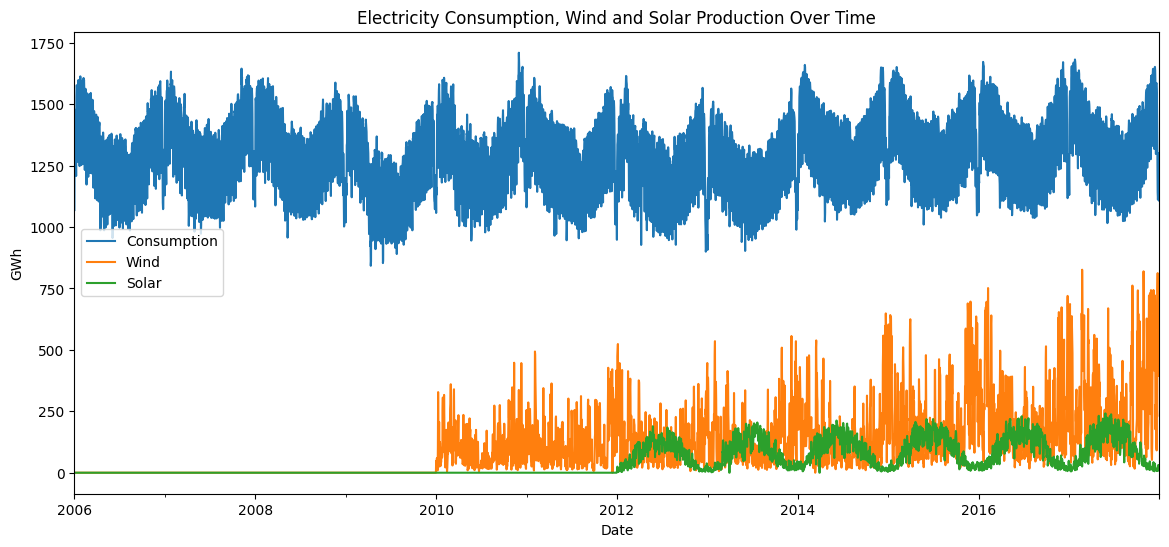

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df_power['Date'] = pd.to_datetime(df_power['Date'])
df_power.set_index('Date', inplace=True)

# Plotting Consumption, Wind, and Solar over time
fig, ax = plt.subplots(figsize=(14, 6))
df_power[['Consumption', 'Wind', 'Solar']].plot(ax=ax)
ax.set_title('Electricity Consumption, Wind and Solar Production Over Time')
ax.set_ylabel('GWh')
plt.show()


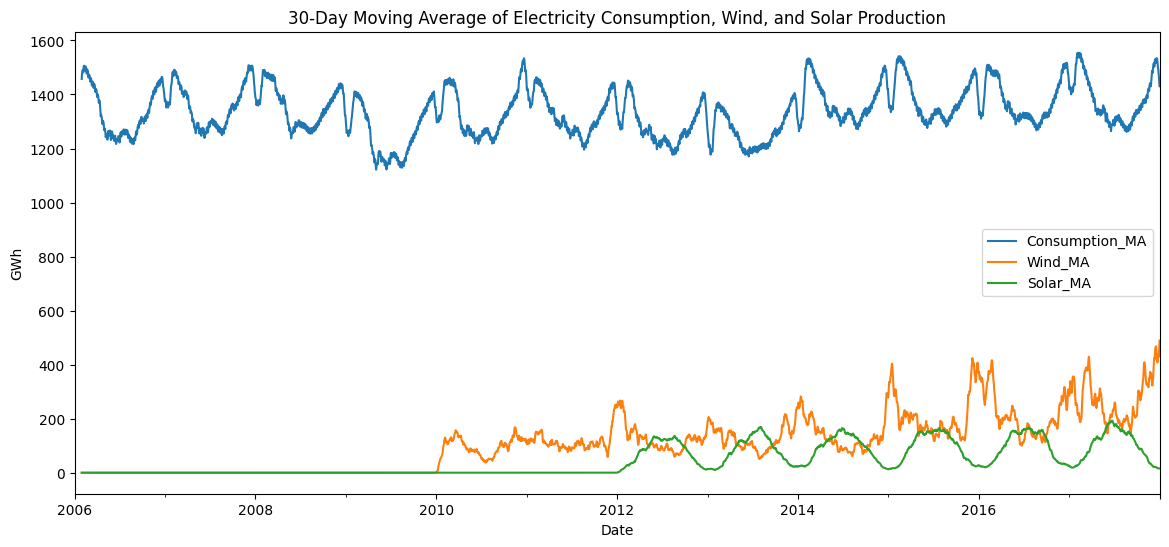

In [ ]:
# Calculate 30-day moving averages for smooth trends
df_power['Consumption_MA'] = df_power['Consumption'].rolling(window=30).mean()
df_power['Wind_MA'] = df_power['Wind'].rolling(window=30).mean()
df_power['Solar_MA'] = df_power['Solar'].rolling(window=30).mean()

# Plotting the moving averages
fig, ax = plt.subplots(figsize=(14, 6))
df_power[['Consumption_MA', 'Wind_MA', 'Solar_MA']].plot(ax=ax)
ax.set_title('30-Day Moving Average of Electricity Consumption, Wind, and Solar Production')
ax.set_ylabel('GWh')
plt.show()


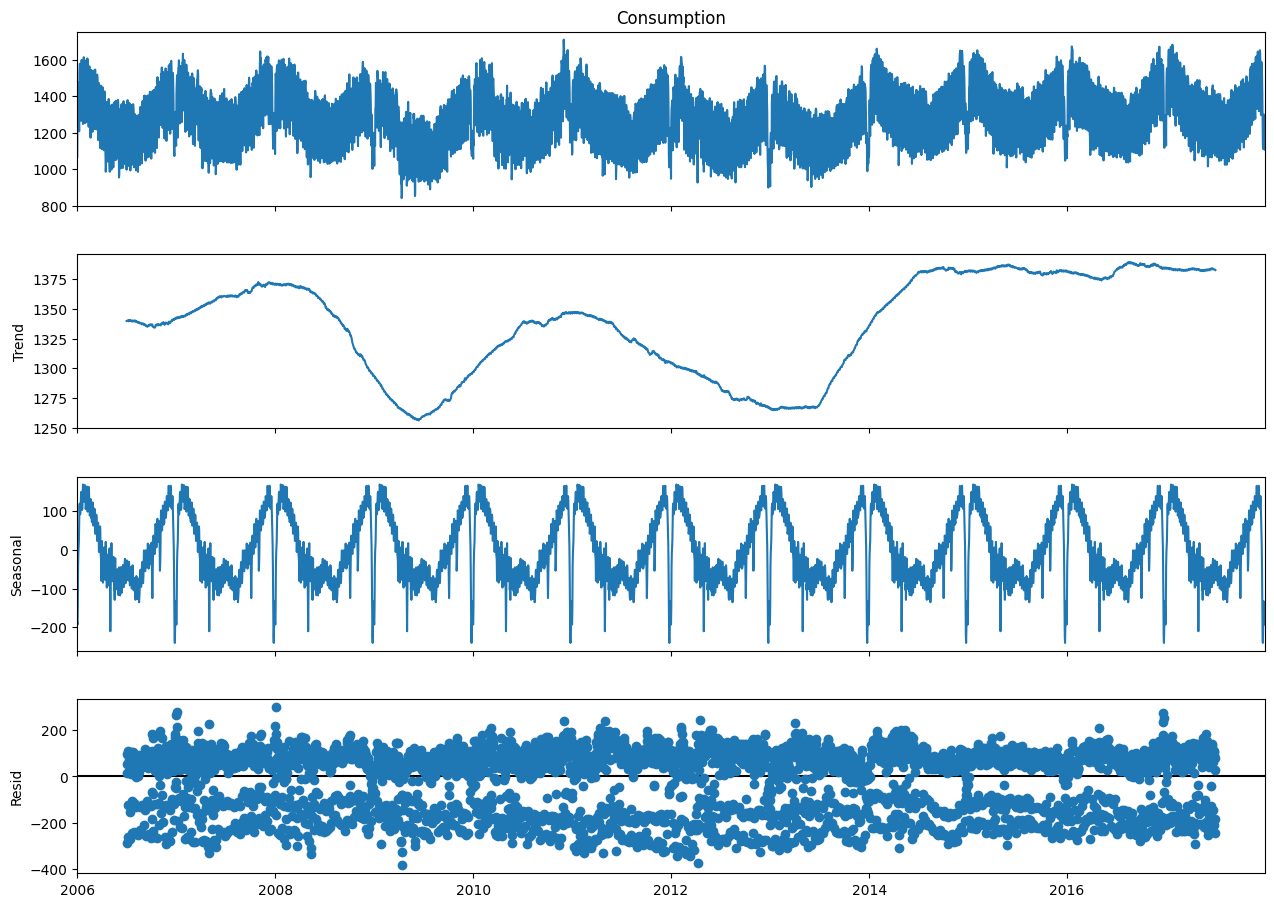

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of the consumption data
decomposition = seasonal_decompose(df_power['Consumption'], model='additive', period=365)

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


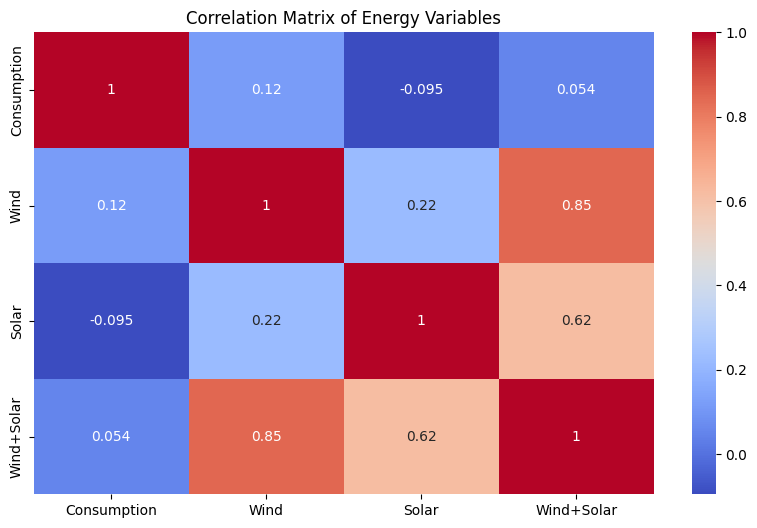

In [ ]:
import seaborn as sns

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_power[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Energy Variables')
plt.show()


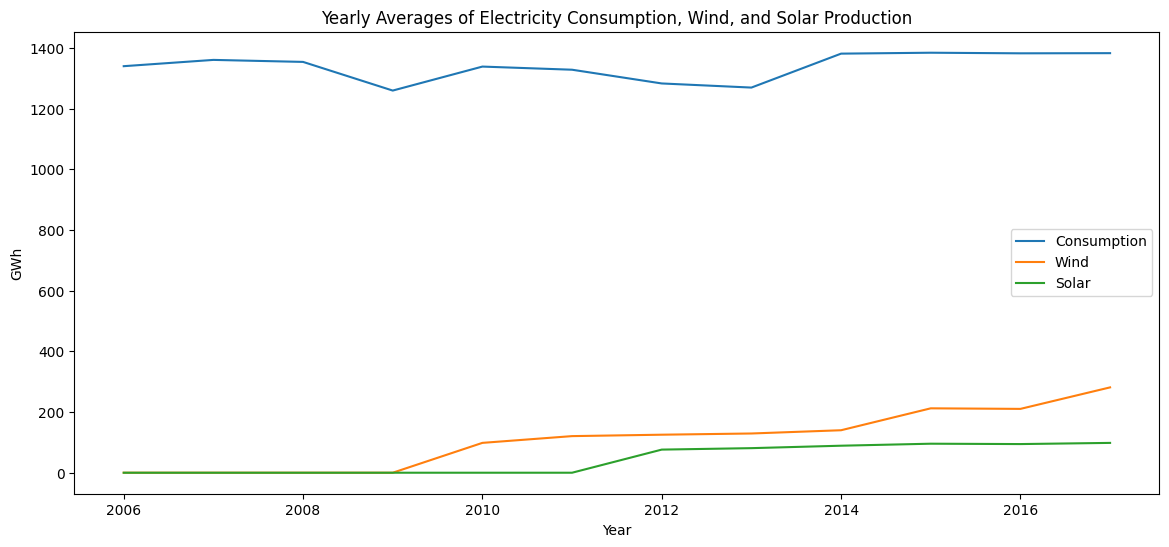

In [ ]:
# Group by year and plot average consumption, wind, and solar production
df_power['Year'] = df_power.index.year

# Plot yearly averages
df_yearly_mean = df_power.groupby('Year')[['Consumption', 'Wind', 'Solar']].mean()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
df_yearly_mean.plot(ax=ax)
ax.set_title('Yearly Averages of Electricity Consumption, Wind, and Solar Production')
ax.set_ylabel('GWh')
plt.show()


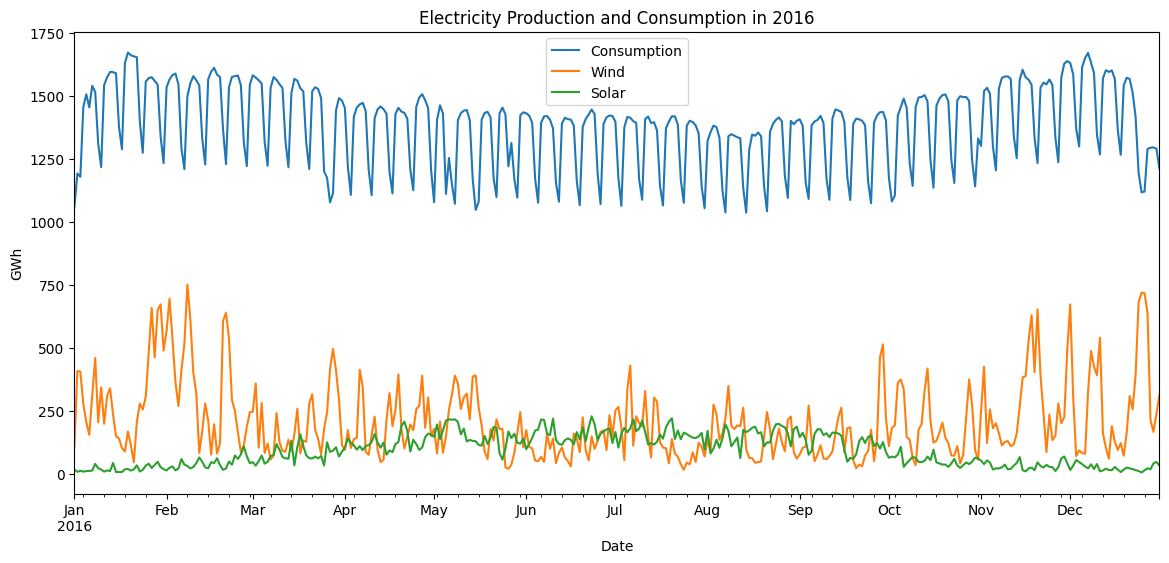

In [ ]:
# Select specific range (e.g., zoom in on 2016)
start, end = '2016-01', '2016-12'
df_power.loc[start:end, ['Consumption', 'Wind', 'Solar']].plot(figsize=(14, 6))
plt.title('Electricity Production and Consumption in 2016')
plt.ylabel('GWh')
plt.show()


In [ ]:
df_power.shape

(4383, 8)

In [ ]:
df_power=pd.read_csv("/content/opsd_germany_daily (1).csv")
df_power.head(10)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
5,2006-01-06,1403.427,NaN,NaN,NaN
6,2006-01-07,1300.287,NaN,NaN,NaN
7,2006-01-08,1207.985,NaN,NaN,NaN
8,2006-01-09,1529.323,NaN,NaN,NaN
9,2006-01-10,1576.911,NaN,NaN,NaN


In [ ]:
df_power['Date']=pd.to_datetime(df_power['Date'])
df_power.set_index(df_power['Date'],inplace=True)
df_power.head(10)

,Date,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,2006-01-09,1529.323,NaN,NaN,NaN


In [ ]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2017-12-22,2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
df_power.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
df_power['year']=df_power.index.year
df_power['month']=df_power.index.month
df_power['day']=df_power.index.day
df_power

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,,
2006-01-01,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1
2006-01-02,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2
2006-01-03,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3
2006-01-04,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4
2006-01-05,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5
...,...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27
2017-12-28,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28
2017-12-29,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29


In [ ]:
df_power.sample(5,random_state=0)

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,,
2008-08-23,2008-08-23,1152.011,NaN,NaN,NaN,2008,8,23
2013-08-08,2013-08-08,1291.984,79.666,93.371,173.037,2013,8,8
2009-08-27,2009-08-27,1281.057,NaN,NaN,NaN,2009,8,27
2015-10-02,2015-10-02,1391.050,81.229,160.641,241.870,2015,10,2
2009-06-02,2009-06-02,1201.522,NaN,NaN,NaN,2009,6,2


In [ ]:
df_power.loc['2016-12-23']

,2016-12-23
Date,2016-12-23 00:00:00
Consumption,1415.811
Wind,395.296
Solar,16.111
Wind+Solar,411.407
year,2016
month,12
day,23


In [ ]:
df_power.loc['2016-9-30':'2016-12-31']

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day
Date,,,,,,,,
2016-09-30,2016-09-30,1403.626,223.673,87.734,311.407,2016,9,30
2016-10-01,2016-10-01,1175.987,111.097,65.258,176.355,2016,10,1
2016-10-02,2016-10-02,1081.683,183.434,69.526,252.960,2016,10,2
2016-10-03,2016-10-03,1105.195,193.540,66.702,260.242,2016,10,3
2016-10-04,2016-10-04,1422.066,363.248,77.268,440.516,2016,10,4
...,...,...,...,...,...,...,...,...
2016-12-27,2016-12-27,1289.324,640.895,23.448,664.343,2016,12,27
2016-12-28,2016-12-28,1294.881,214.990,19.450,234.440,2016,12,28
2016-12-29,2016-12-29,1295.897,167.698,42.910,210.608,2016,12,29


<Axes: xlabel='Date'>

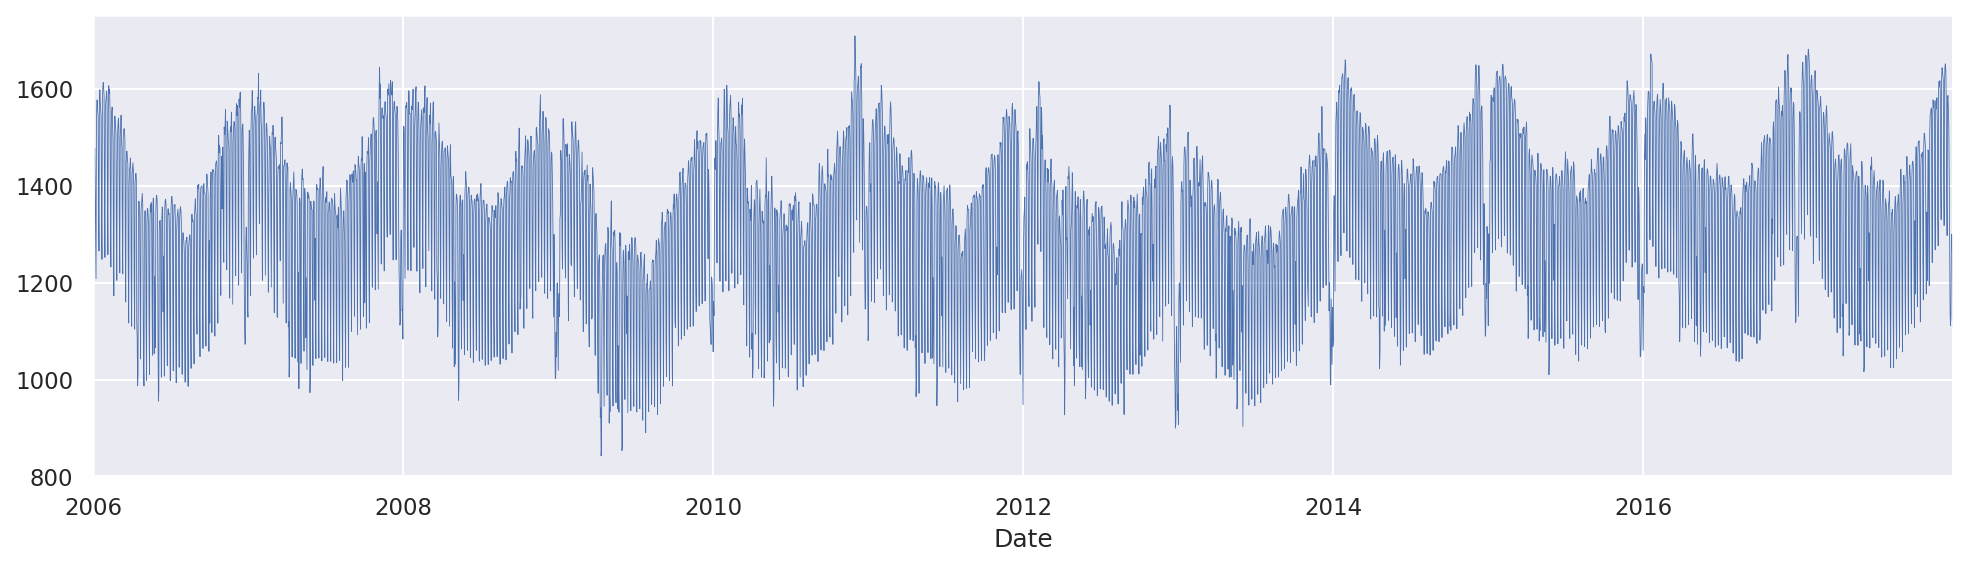

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,4)})
plt.rcParams['figure.dpi']=150
df_power['Consumption'].plot(linewidth=0.4)

# New Section